In [1]:
import ROOT
import numpy as np

Welcome to JupyROOT 6.26/06


ldd: exited with unknown exit code (139)


In [2]:
File = ROOT.TFile("merged_data.root")
Tree = File.Get("Tree")

Error in <TList::Clear>: A list is accessing an object (0x69f8720) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6a7f8e0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6a7fd10) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6a3c130) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6a3c4a0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6a3c910) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6acd570) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6ad4ba0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6ad4f20) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6ad53c0) alread

In [3]:
Tree.Print()

******************************************************************************
*Tree    :Tree      : Strangeness enhancement tree v0                        *
*Entries :  5753343 : Total =      9212781765 bytes  File  Size = 2243545023 *
*        :          : Tree compression factor =   4.11                       *
******************************************************************************
*Br    0 :Ecm       : Ecm/D                                                  *
*Entries :  5753343 : Total  Size=   46180229 bytes  File Size  =     516055 *
*Baskets :     1702 : Basket Size=      32000 bytes  Compression=  89.42     *
*............................................................................*
*Br    1 :Nch       : Nch/L                                                  *
*Entries :  5753343 : Total  Size=   46180229 bytes  File Size  =    6146608 *
*Baskets :     1702 : Basket Size=      32000 bytes  Compression=   7.51     *
*...................................................

In [5]:
HMass1OSAll = ROOT.TH1D("HMass1OSAll", "All pairs;di-track mass (GeV);Counts", 100, 0.40, 0.60)
HMass2OSAll = ROOT.TH1D("HMass2OSAll", "All pairs;di-track mass (GeV);Counts", 100, 0.95, 1.10)
HMass1OSOne = ROOT.TH1D("HMass1OSOne", "All pairs, one tagged as pion (QTagger);di-track mass (GeV);Counts", 100, 0.40, 0.60)
HMass2OSOne = ROOT.TH1D("HMass2OSOne", "All pairs, one tagged as kaon (QTagger);di-track mass (GeV);Counts", 100, 0.95, 1.10)
HMass1OSTwo = ROOT.TH1D("HMass1OSTwo", "All pairs, both tagged as pion (QTagger);di-track mass (GeV);Counts", 100, 0.40, 0.60)
HMass2OSTwo = ROOT.TH1D("HMass2OSTwo", "All pairs, both tagged as kaon (QTagger);di-track mass (GeV);Counts", 100, 0.95, 1.10)
HMass1SSAll = ROOT.TH1D("HMass1SSAll", "All pairs;di-track mass (GeV);Counts", 100, 0.40, 0.60)
HMass2SSAll = ROOT.TH1D("HMass2SSAll", "All pairs;di-track mass (GeV);Counts", 100, 0.95, 1.10)
HMass1SSOne = ROOT.TH1D("HMass1SSOne", "All pairs, one tagged as pion (QTagger);di-track mass (GeV);Counts", 100, 0.40, 0.60)
HMass2SSOne = ROOT.TH1D("HMass2SSOne", "All pairs, one tagged as kaon (QTagger);di-track mass (GeV);Counts", 100, 0.95, 1.10)
HMass1SSTwo = ROOT.TH1D("HMass1SSTwo", "All pairs, both tagged as pion (QTagger);di-track mass (GeV);Counts", 100, 0.40, 0.60)
HMass2SSTwo = ROOT.TH1D("HMass2SSTwo", "All pairs, both tagged as kaon (QTagger);di-track mass (GeV);Counts", 100, 0.95, 1.10)

EventCount = 0
for event in Tree:
    # print(np.array(event.RecoPx))

    RecoPx         = np.array(event.RecoPx)
    RecoPy         = np.array(event.RecoPy)
    RecoPz         = np.array(event.RecoPz)
    RecoCharge     = np.array(event.RecoCharge)
    RecoPIDQKaon   = np.array(event.RecoPIDQKaon)
    RecoPIDQProton = np.array(event.RecoPIDQProton)

    RecoP2         = RecoPx * RecoPx + RecoPy * RecoPy + RecoPz * RecoPz
    RecoEPi        = np.sqrt(RecoP2 + 0.13957 * 0.13957)
    RecoEK         = np.sqrt(RecoP2 + 0.49368 * 0.49368)

    PositivePx     = RecoPx[RecoCharge > 0]
    PositivePy     = RecoPy[RecoCharge > 0]
    PositivePz     = RecoPz[RecoCharge > 0]
    PositiveEPi    = RecoEPi[RecoCharge > 0]
    PositiveEK     = RecoEK[RecoCharge > 0]
    PositiveQK     = RecoPIDQKaon[RecoCharge > 0]
    PositiveQP     = RecoPIDQKaon[RecoCharge > 0]

    NegativePx     = RecoPx[RecoCharge < 0]
    NegativePy     = RecoPy[RecoCharge < 0]
    NegativePz     = RecoPz[RecoCharge < 0]
    NegativeEPi    = RecoEPi[RecoCharge < 0]
    NegativeEK     = RecoEK[RecoCharge < 0]
    NegativeQK     = RecoPIDQKaon[RecoCharge < 0]
    NegativeQP     = RecoPIDQKaon[RecoCharge < 0]

    NPositive      = len(PositivePx)
    NNegative      = len(NegativePx)

    # print(NPositive, NNegative)

    for i1 in range(NPositive):
        for i2 in range(i1 + 1, NPositive):
            PairPx  = PositivePx[i1]  + PositivePx[i2]
            PairPy  = PositivePy[i1]  + PositivePy[i2]
            PairPz  = PositivePz[i1]  + PositivePz[i2]
            PairEPi = PositiveEPi[i1] + PositiveEPi[i2]
            PairEK  = PositiveEK[i1]  + PositiveEK[i2]

            PairMPi = np.sqrt(PairEPi * PairEPi - PairPx * PairPx - PairPy * PairPy - PairPz * PairPz)
            PairMK  = np.sqrt(PairEK * PairEK - PairPx * PairPx - PairPy * PairPy - PairPz * PairPz)

            HMass1SSAll.Fill(PairMPi)
            HMass2SSAll.Fill(PairMK)

            if PositiveQK[i1] == 0 or PositiveQK[i2] == 0:
                HMass1SSOne.Fill(PairMPi)
            if PositiveQK[i1] >= 2 or PositiveQK[i2] >= 2:
                HMass2SSOne.Fill(PairMK)

            if PositiveQK[i1] == 0 and PositiveQK[i2] == 0:
                HMass1SSTwo.Fill(PairMPi)
            if PositiveQK[i1] >= 2 and PositiveQK[i2] >= 2:
                HMass2SSTwo.Fill(PairMK)

    for i1 in range(NNegative):
        for i2 in range(i1 + 1, NNegative):
            PairPx  = NegativePx[i1]  + NegativePx[i2]
            PairPy  = NegativePy[i1]  + NegativePy[i2]
            PairPz  = NegativePz[i1]  + NegativePz[i2]
            PairEPi = NegativeEPi[i1] + NegativeEPi[i2]
            PairEK  = NegativeEK[i1]  + NegativeEK[i2]

            PairMPi = np.sqrt(PairEPi * PairEPi - PairPx * PairPx - PairPy * PairPy - PairPz * PairPz)
            PairMK  = np.sqrt(PairEK * PairEK - PairPx * PairPx - PairPy * PairPy - PairPz * PairPz)

            HMass1SSAll.Fill(PairMPi)
            HMass2SSAll.Fill(PairMK)

            if NegativeQK[i1] == 0 or NegativeQK[i2] == 0:
                HMass1SSOne.Fill(PairMPi)
            if NegativeQK[i1] >= 2 or NegativeQK[i2] >= 2:
                HMass2SSOne.Fill(PairMK)

            if NegativeQK[i1] == 0 and NegativeQK[i2] == 0:
                HMass1SSTwo.Fill(PairMPi)
            if NegativeQK[i1] >= 2 and NegativeQK[i2] >= 2:
                HMass2SSTwo.Fill(PairMK)

    for iP in range(NPositive):
        for iN in range(NNegative):
            PairPx  = PositivePx[iP]  + NegativePx[iN]
            PairPy  = PositivePy[iP]  + NegativePy[iN]
            PairPz  = PositivePz[iP]  + NegativePz[iN]
            PairEPi = PositiveEPi[iP] + NegativeEPi[iN]
            PairEK  = PositiveEK[iP]  + NegativeEK[iN]

            PairMPi = np.sqrt(PairEPi * PairEPi - PairPx * PairPx - PairPy * PairPy - PairPz * PairPz)
            PairMK  = np.sqrt(PairEK * PairEK - PairPx * PairPx - PairPy * PairPy - PairPz * PairPz)

            HMass1OSAll.Fill(PairMPi)
            HMass2OSAll.Fill(PairMK)

            if PositiveQK[iP] == 0 or NegativeQK[iN] == 0:
                HMass1OSOne.Fill(PairMPi)
            if PositiveQK[iP] >= 2 or NegativeQK[iN] >= 2:
                HMass2OSOne.Fill(PairMK)

            if PositiveQK[iP] == 0 and NegativeQK[iN] == 0:
                HMass1OSTwo.Fill(PairMPi)
            if PositiveQK[iP] >= 2 and NegativeQK[iN] >= 2:
                HMass2OSTwo.Fill(PairMK)

    EventCount = EventCount + 1
    if EventCount % 5000 == 0:
        print("Processed event", EventCount)
    if EventCount >= 1000000:
        break


Processed event 5000
Processed event 10000
Processed event 15000
Processed event 20000
Processed event 25000
Processed event 30000
Processed event 35000
Processed event 40000
Processed event 45000
Processed event 50000
Processed event 55000
Processed event 60000
Processed event 65000
Processed event 70000
Processed event 75000
Processed event 80000
Processed event 85000
Processed event 90000
Processed event 95000
Processed event 100000
Processed event 105000
Processed event 110000
Processed event 115000
Processed event 120000
Processed event 125000
Processed event 130000
Processed event 135000
Processed event 140000
Processed event 145000
Processed event 150000
Processed event 155000
Processed event 160000
Processed event 165000
Processed event 170000
Processed event 175000
Processed event 180000
Processed event 185000
Processed event 190000
Processed event 195000
Processed event 200000
Processed event 205000
Processed event 210000
Processed event 215000
Processed event 220000
Processe

Warning in <TFile::Append>: Replacing existing TH1: HMass1OSAll (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HMass2OSAll (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HMass1OSOne (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HMass2OSOne (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HMass1OSTwo (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HMass2OSTwo (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HMass1SSAll (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HMass2SSAll (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HMass1SSOne (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HMass2SSOne (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: HMass1SSTwo (Potential memory leak).
Warning in <TFile::Ap

Info in <TCanvas::Print>: pdf file DiTrackMass_Data.pdf has been created


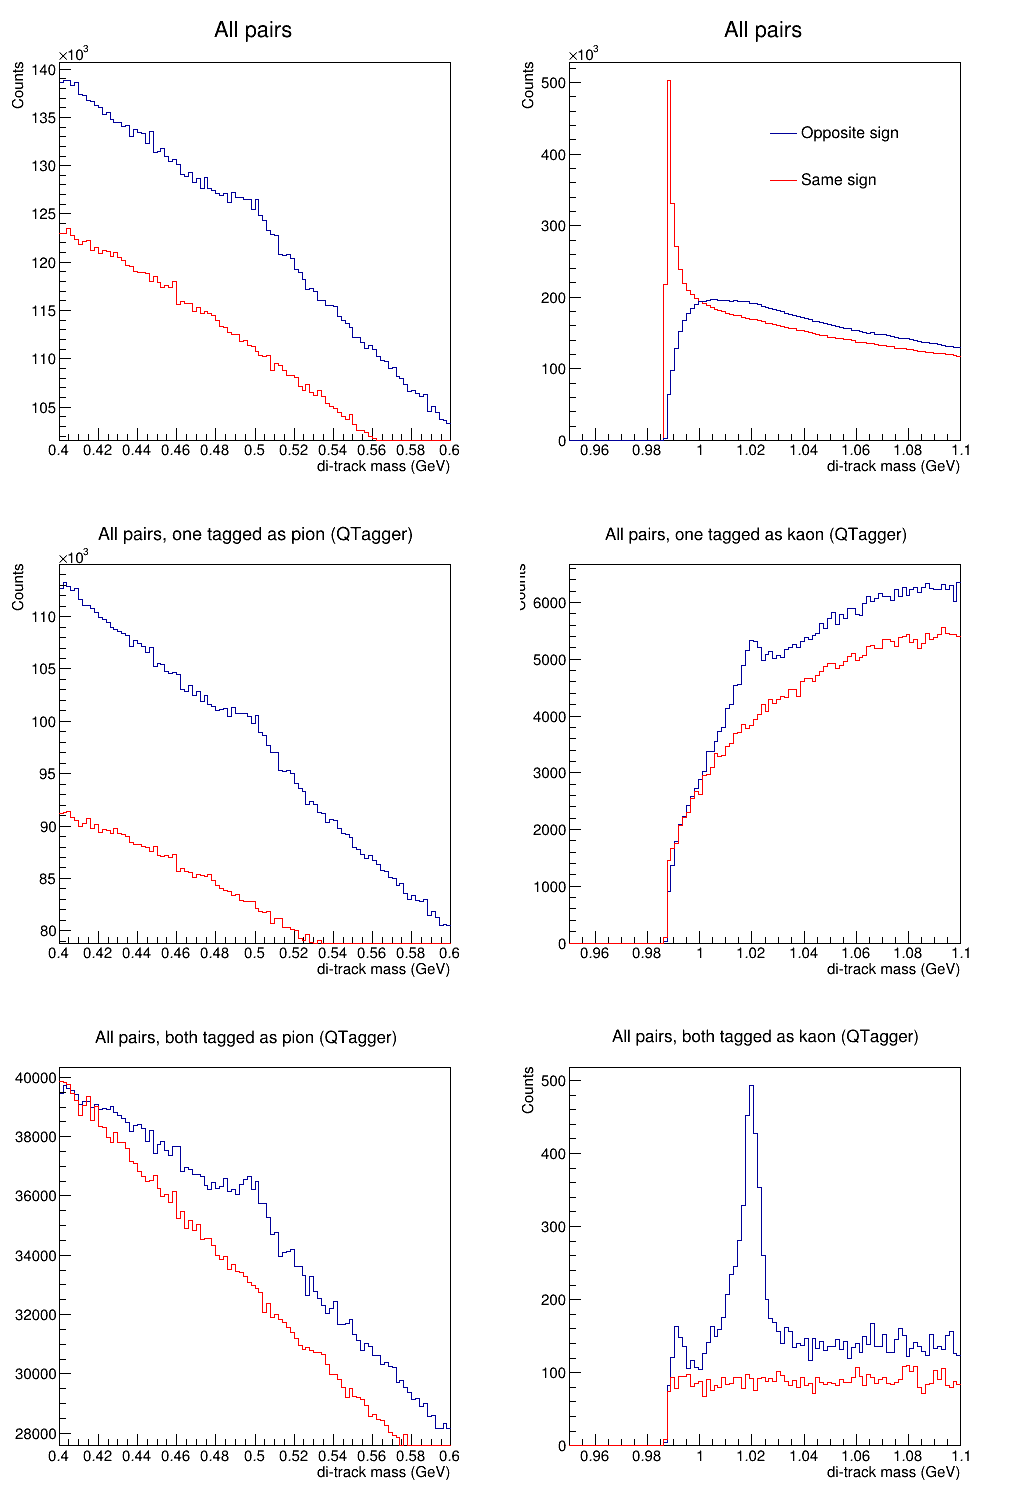

In [6]:
Canvas = ROOT.TCanvas("Canvas", "Canvas", 1024, 1536)
Canvas.Divide(2, 3)

HMass1OSAll.SetStats(0)
HMass2OSAll.SetStats(0)
HMass1OSOne.SetStats(0)
HMass2OSOne.SetStats(0)
HMass1OSTwo.SetStats(0)
HMass2OSTwo.SetStats(0)

HMass1SSAll.SetStats(0)
HMass2SSAll.SetStats(0)
HMass1SSOne.SetStats(0)
HMass2SSOne.SetStats(0)
HMass1SSTwo.SetStats(0)
HMass2SSTwo.SetStats(0)

HMass1SSAll.SetLineColor(ROOT.kRed)
HMass2SSAll.SetLineColor(ROOT.kRed)
HMass1SSOne.SetLineColor(ROOT.kRed)
HMass2SSOne.SetLineColor(ROOT.kRed)
HMass1SSTwo.SetLineColor(ROOT.kRed)
HMass2SSTwo.SetLineColor(ROOT.kRed)

Legend = ROOT.TLegend(0.5, 0.8, 0.8, 0.6)
Legend.SetFillStyle(0)
Legend.SetBorderSize(0)
Legend.AddEntry(HMass1OSAll, "Opposite sign", "l")
Legend.AddEntry(HMass1SSAll, "Same sign", "l")

Canvas.cd(1)
HMass1OSAll.Draw()
HMass1SSAll.Draw("same")
Canvas.cd(2)
HMass2SSAll.Draw("")
HMass2OSAll.Draw("same")
Legend.Draw()

Canvas.cd(3)
HMass1OSOne.Draw()
HMass1SSOne.Draw("same")
Canvas.cd(4)
HMass2OSOne.Draw()
HMass2SSOne.Draw("same")

Canvas.cd(5)
HMass1OSTwo.Draw()
HMass1SSTwo.Draw("same")
Canvas.cd(6)
HMass2OSTwo.Draw()
HMass2SSTwo.Draw("same")

Canvas.Draw()
Canvas.SaveAs("DiTrackMass_Data.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


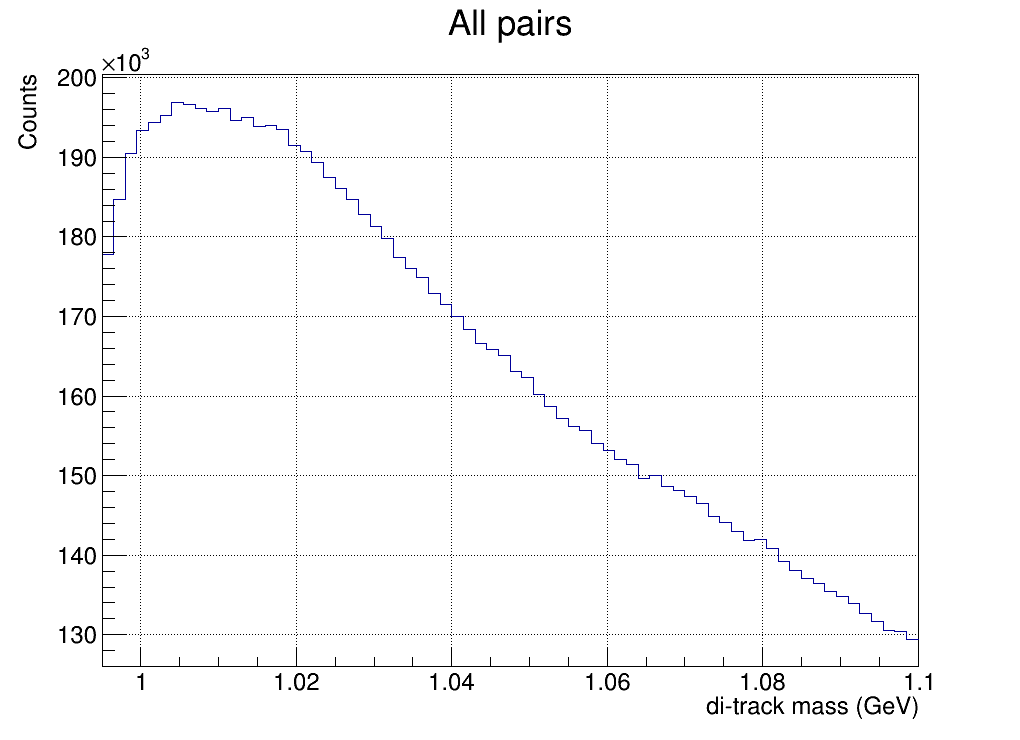

In [13]:
Canvas = ROOT.TCanvas("Canvas", "Canvas", 1024, 768)

HMass2OSAll.GetXaxis().SetRangeUser(0.995, 1.1)
HMass2OSAll.Draw()

Canvas.SetGridx()
Canvas.SetGridy()
Canvas.Draw()